In [194]:
import glob
from PIL import Image
from torchvision import transforms
import torch
import numpy as np
import matplotlib.pyplot as plt
import json

In [195]:
# set_type = "train"
set_type = "val"
root_path = "./2017"
video_names_path = f"{root_path}/ImageSets/2017/{set_type}.txt"
# load the video names
with open(video_names_path, "r") as f:
    video_names = f.readlines()
video_names = [x.strip() for x in video_names]
video_names

['bike-packing',
 'blackswan',
 'bmx-trees',
 'breakdance',
 'camel',
 'car-roundabout',
 'car-shadow',
 'cows',
 'dance-twirl',
 'dog',
 'dogs-jump',
 'drift-chicane',
 'drift-straight',
 'goat',
 'gold-fish',
 'horsejump-high',
 'india',
 'judo',
 'kite-surf',
 'lab-coat',
 'libby',
 'loading',
 'mbike-trick',
 'motocross-jump',
 'paragliding-launch',
 'parkour',
 'pigs',
 'scooter-black',
 'shooting',
 'soapbox']

In [196]:
glob.glob(f"{root_path}/JPEGImages/480p/bear/*.jpg")

['./2017/JPEGImages/480p/bear/00021.jpg',
 './2017/JPEGImages/480p/bear/00015.jpg',
 './2017/JPEGImages/480p/bear/00042.jpg',
 './2017/JPEGImages/480p/bear/00022.jpg',
 './2017/JPEGImages/480p/bear/00036.jpg',
 './2017/JPEGImages/480p/bear/00007.jpg',
 './2017/JPEGImages/480p/bear/00055.jpg',
 './2017/JPEGImages/480p/bear/00013.jpg',
 './2017/JPEGImages/480p/bear/00020.jpg',
 './2017/JPEGImages/480p/bear/00071.jpg',
 './2017/JPEGImages/480p/bear/00029.jpg',
 './2017/JPEGImages/480p/bear/00032.jpg',
 './2017/JPEGImages/480p/bear/00011.jpg',
 './2017/JPEGImages/480p/bear/00026.jpg',
 './2017/JPEGImages/480p/bear/00010.jpg',
 './2017/JPEGImages/480p/bear/00041.jpg',
 './2017/JPEGImages/480p/bear/00016.jpg',
 './2017/JPEGImages/480p/bear/00014.jpg',
 './2017/JPEGImages/480p/bear/00034.jpg',
 './2017/JPEGImages/480p/bear/00038.jpg',
 './2017/JPEGImages/480p/bear/00004.jpg',
 './2017/JPEGImages/480p/bear/00000.jpg',
 './2017/JPEGImages/480p/bear/00073.jpg',
 './2017/JPEGImages/480p/bear/0006

In [197]:
video_datas = {}
for video_name in video_names:
    tmp_data = {}
    tmp_data["video_paths"] = sorted(glob.glob(f"{root_path}/JPEGImages/480p/{video_name}/*.jpg"))
    tmp_data["annotation_paths"] = sorted(glob.glob(f"{root_path}/Annotations/480p/{video_name}/*.png"))
    video_datas[video_name] = tmp_data
video_datas[video_names[0]]

{'video_paths': ['./2017/JPEGImages/480p/bike-packing/00000.jpg',
  './2017/JPEGImages/480p/bike-packing/00001.jpg',
  './2017/JPEGImages/480p/bike-packing/00002.jpg',
  './2017/JPEGImages/480p/bike-packing/00003.jpg',
  './2017/JPEGImages/480p/bike-packing/00004.jpg',
  './2017/JPEGImages/480p/bike-packing/00005.jpg',
  './2017/JPEGImages/480p/bike-packing/00006.jpg',
  './2017/JPEGImages/480p/bike-packing/00007.jpg',
  './2017/JPEGImages/480p/bike-packing/00008.jpg',
  './2017/JPEGImages/480p/bike-packing/00009.jpg',
  './2017/JPEGImages/480p/bike-packing/00010.jpg',
  './2017/JPEGImages/480p/bike-packing/00011.jpg',
  './2017/JPEGImages/480p/bike-packing/00012.jpg',
  './2017/JPEGImages/480p/bike-packing/00013.jpg',
  './2017/JPEGImages/480p/bike-packing/00014.jpg',
  './2017/JPEGImages/480p/bike-packing/00015.jpg',
  './2017/JPEGImages/480p/bike-packing/00016.jpg',
  './2017/JPEGImages/480p/bike-packing/00017.jpg',
  './2017/JPEGImages/480p/bike-packing/00018.jpg',
  './2017/JPEGIm

In [198]:
anno_transform = transforms.Compose(
    [
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        # transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ]
)

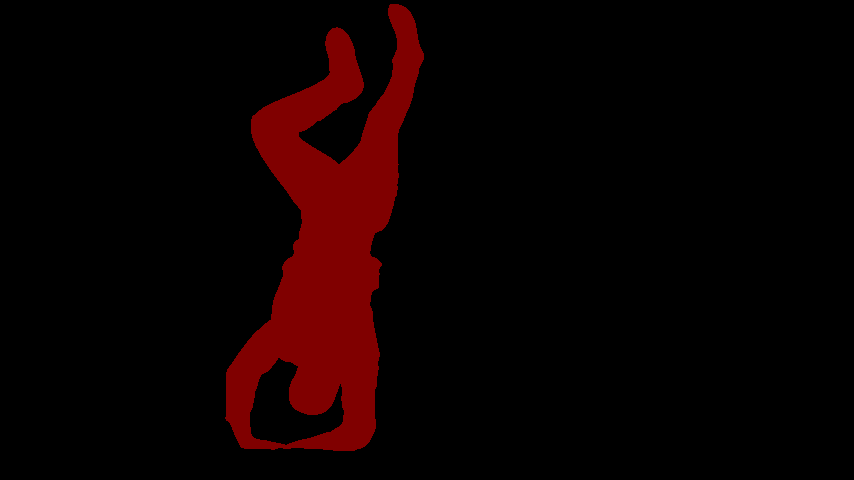

In [199]:
anno_path = video_datas[video_names[3]]["annotation_paths"][0]
anno_img = Image.open(anno_path).convert("RGB")
anno_img

In [200]:
anno_colors = anno_img.getcolors()
anno_colors = [x[1] for x in anno_colors]
anno_colors = sorted(anno_colors)
anno_colors = np.array(anno_colors)
anno_colors

array([[  0,   0,   0],
       [128,   0,   0]])

In [201]:
assert (anno_colors[0] == np.array([0, 0, 0])).all()

In [202]:
anno_array = np.array(anno_img)
anno_array.shape

(480, 854, 3)

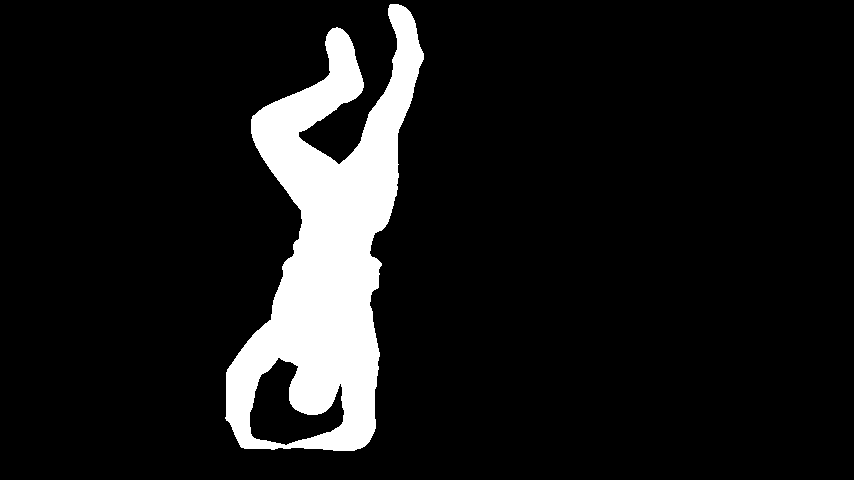

In [203]:
def reserve_color(anno_array: np.ndarray, color: np.ndarray) -> np.ndarray:
    # anno_array = anno_array.copy()
    mask = np.all(anno_array == color, axis=-1)
    # anno_array[mask] = (255, 255, 255)
    # anno_array[~mask] = (0, 0, 0)
    return mask
one_anno_array = reserve_color(anno_array, anno_colors[1])
one_anno_image = Image.fromarray(one_anno_array)
one_anno_image

torch.Size([224, 224])


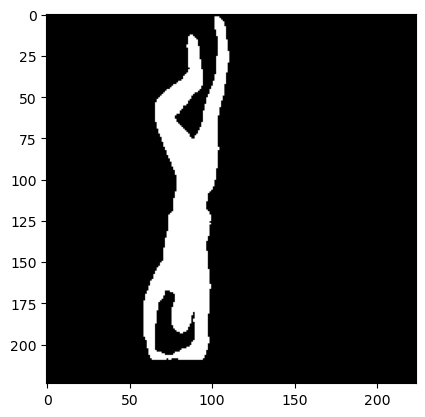

In [204]:
one_anno_tensor = anno_transform(one_anno_image).squeeze(0)
print(one_anno_tensor.shape)
plt.imshow(one_anno_tensor.numpy(), cmap="gray")

In [205]:
def get_colors(anno_img: Image.Image) -> np.ndarray:
    anno_colors = anno_img.getcolors()
    anno_colors = [x[1] for x in anno_colors]
    anno_colors = sorted(anno_colors)
    anno_colors = np.array(anno_colors)
    assert (anno_colors[0] == np.array([0, 0, 0])).all()
    return anno_colors[1:].tolist()
get_colors(anno_img)

[[128, 0, 0]]

In [206]:
video_datas = {}
max_length = 0
max_length_video_name = ""
for video_name in video_names:
    tmp_data = {}
    tmp_data["img_paths"] = sorted(glob.glob(f"{root_path}/JPEGImages/480p/{video_name}/*.jpg"))
    tmp_data["anno_paths"] = sorted(glob.glob(f"{root_path}/Annotations/480p/{video_name}/*.png"))
    first_anno_img = Image.open(tmp_data["anno_paths"][0]).convert("RGB")
    tmp_data["anno_colors"] = get_colors(first_anno_img)
    video_datas[video_name] = tmp_data
    if len(tmp_data["anno_colors"]) > max_length:
        max_length = len(tmp_data["anno_colors"])
        max_length_video_name = video_name
video_datas[video_names[0]]

{'img_paths': ['./2017/JPEGImages/480p/bike-packing/00000.jpg',
  './2017/JPEGImages/480p/bike-packing/00001.jpg',
  './2017/JPEGImages/480p/bike-packing/00002.jpg',
  './2017/JPEGImages/480p/bike-packing/00003.jpg',
  './2017/JPEGImages/480p/bike-packing/00004.jpg',
  './2017/JPEGImages/480p/bike-packing/00005.jpg',
  './2017/JPEGImages/480p/bike-packing/00006.jpg',
  './2017/JPEGImages/480p/bike-packing/00007.jpg',
  './2017/JPEGImages/480p/bike-packing/00008.jpg',
  './2017/JPEGImages/480p/bike-packing/00009.jpg',
  './2017/JPEGImages/480p/bike-packing/00010.jpg',
  './2017/JPEGImages/480p/bike-packing/00011.jpg',
  './2017/JPEGImages/480p/bike-packing/00012.jpg',
  './2017/JPEGImages/480p/bike-packing/00013.jpg',
  './2017/JPEGImages/480p/bike-packing/00014.jpg',
  './2017/JPEGImages/480p/bike-packing/00015.jpg',
  './2017/JPEGImages/480p/bike-packing/00016.jpg',
  './2017/JPEGImages/480p/bike-packing/00017.jpg',
  './2017/JPEGImages/480p/bike-packing/00018.jpg',
  './2017/JPEGImag

In [207]:
max_length, max_length_video_name

(5, 'gold-fish')

In [209]:
# save the video datas
video_datas_path = f"{root_path}/{set_type}_video_datas.json"
with open(video_datas_path, "w") as f:
    json.dump(video_datas, f)